# 线性回归实验
**主要内容**：
- 线性回归方程实现
- 梯度下降效果
- 对比不同梯度下降策略
- 建模曲线分析
- 过拟合与欠拟合
- 正则化的作用
- 提前停止策略
  

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

**回归方程**：
$$
\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+\cdots+\theta_nx_n \tag{1}
$$

$$
MSE(X,h_\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})^2 \tag{2}
$$

$$
\Rightarrow \hat{\theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y \tag{3}
$$

## 回归方程实现

theta =  [[3.90254316]
 [3.11962388]]
y_pred=  [[ 3.90254316]
 [10.14179093]]


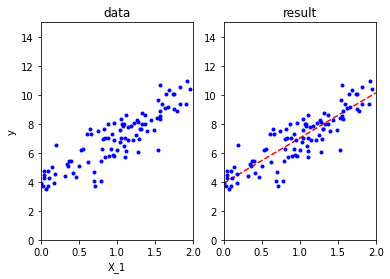

In [2]:
'''初始化随机数据'''
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

'''加入一列 X_0'''
X_bias = np.c_[np.ones((100, 1)), X]

'''公式(3)代码实现'''
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

'''给出一个测试数据'''
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta)

print('theta = ', theta)
print('y_pred= ',y_pred)

plt.subplot(1, 2, 1)
plt.plot(X, y, 'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.title('data')

plt.subplot(1, 2, 2)
plt.plot(X_new, y_pred, 'r--')
plt.plot(X, y, 'b.')
plt.title('result')
plt.axis([0,2,0,15])
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X, y)
print('theta=',linear_regression.coef_)
print('bias= ', linear_regression.intercept_)

theta= [[3.11962388]]
bias=  [3.90254316]


## 梯度下降

**问题**：
- 步长太小：训练时间长
- 步长太大：容易漏掉最优解，造成振荡
- 局部最低点，全局最低点

**标准化**：将数据进行归一化处理，数据预处理
- 拿到数据之后做一次标准化操作

**批量梯度下降**：

$$
\frac{\partial}{\partial\theta_j}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})x_j^{(i)}
$$

$$
\Rightarrow\nabla_\theta MSE(\theta)=\begin{pmatrix} \frac{\partial}{\partial\theta_0}MSE(\theta)
\\ \frac{\partial}{\partial\theta_1}MSE(\theta)
\\ \vdots
\\\frac{\partial}{\partial\theta_n}MSE(\theta)
\end{pmatrix}=\frac{2}{m}X^T\cdot(X\cdot\theta-y)
$$

In [4]:
lr = 0.1
num_iterations = 1000
m = 100
theta = np.random.randn(2, 1)
for iteration in range(num_iterations):
    gradients = 2/m*X_bias.T.dot(X_bias.dot(theta)-y)
    theta = theta-lr*gradients
print(theta)

[[3.90254316]
 [3.11962388]]


In [5]:
X_new_b.dot(theta)

array([[ 3.90254316],
       [10.14179093]])

**学习率对结果的影响**

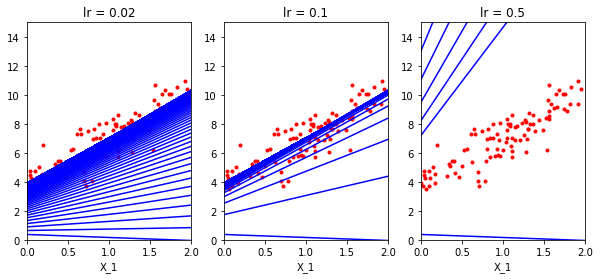

In [6]:
theta_path_bgd = []
def plot_gradient_descent(theta, lr, theta_path=None):
    m = len(X_bias)
    plt.plot(X, y, 'r.')
    num_iterations = 1000
    for iteration in range(num_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'b-')
        gradients = 2/m * X_bias.T.dot(X_bias.dot(theta)-y)
        theta = theta -lr*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0,2,0,15])
    plt.title('lr = {}'.format(lr))

theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plot_gradient_descent(theta, lr = 0.02)
plt.subplot(1,3,2)
plot_gradient_descent(theta, lr = 0.1, theta_path=theta_path_bgd)
plt.subplot(1,3,3)
plot_gradient_descent(theta, lr = 0.5)
plt.show()

**随机梯度下降**

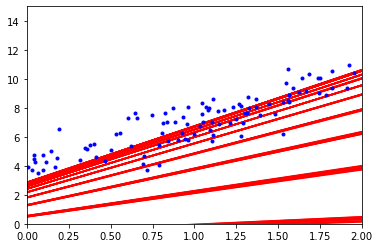

In [7]:
theta_path_sgd = []
m = len(X_bias)
n_epochs = 50

# 衰减策略
t0 = 5
t1 = 50

def learning_schedule(t):
    return t0/(t1+t)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch <10 and i<10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, 'r-')
        random_index = np.random.randint(m)
        xi = X_bias[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        lr = learning_schedule(n_epochs*m+i)
        theta = theta-lr*gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

**小批量梯度下降**

In [8]:
theta_path_mgd = []
n_epochs = 50
minbatch = 16
theta = np.random.randn(2,1)

t=0

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_bias_shuffled = X_bias[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0,m, minbatch):
        t += 1
        xi = X_bias_shuffled[i:i+minbatch]
        yi = y_shuffled[i:i+minbatch]
        gradients = 2/minbatch * xi.T.dot(xi.dot(theta)-yi)
        lr = learning_schedule(t)
        theta = theta - lr*gradients
        theta_path_mgd.append(theta)

theta

array([[3.70730006],
       [3.28748092]])

**三种策略对比实验**

In [19]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

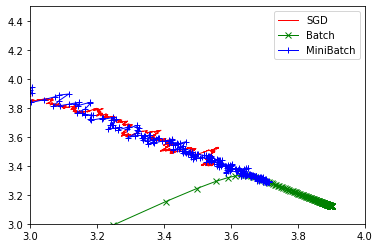

In [29]:
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], 'r-', linewidth=1, label='SGD')
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], 'g-x', linewidth=1, label='Batch')
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], 'b-+', linewidth=1, label='MiniBatch')
plt.legend(loc='upper right')
plt.axis([3,4,3,4.5])
plt.show()
